In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


# Süpermarket Şube Satış Analizi
Bu veri kümesi, bir süpermarket zincirinin farklı şubelerine ait performans verilerini içerir. Amaç, mağazaların satış performansını analiz ederek eksiklikleri gidermek ve güçlü yönleri geliştirmektir.  

## İçerik  
- **Store ID**: Mağaza kimliği (pozitif tamsayı).  
- **Store_Area**: Mağazanın metre kare cinsinden alanı.  
- **Items_Available**: Mağazada bulunan farklı ürün sayısı.  
- **Daily_Customer_Count**: Günlük ortalama müşteri sayısı.  
- **Store_Sales**: Mağazanın ABD doları cinsinden yaptığı satışlar.  

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# CSV dosyasını oku, ilk sütunu indeks sütunu olarak kullan
data=pd.read_csv("/kaggle/input/stores-area-and-sales-data/Stores.csv", index_col=0)
# İlk 5 satırı görüntüle
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [53]:
# data DataFrame'inin açıklayıcı istatistiklerini hesapla ve transpoze et
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


In [54]:
# data DataFrame'inin genel bilgi özetini göster
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 1 to 896
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 35.0 KB


In [55]:
# Her sütundaki eksik (NaN) değerlerin sayısını hesapla
data.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

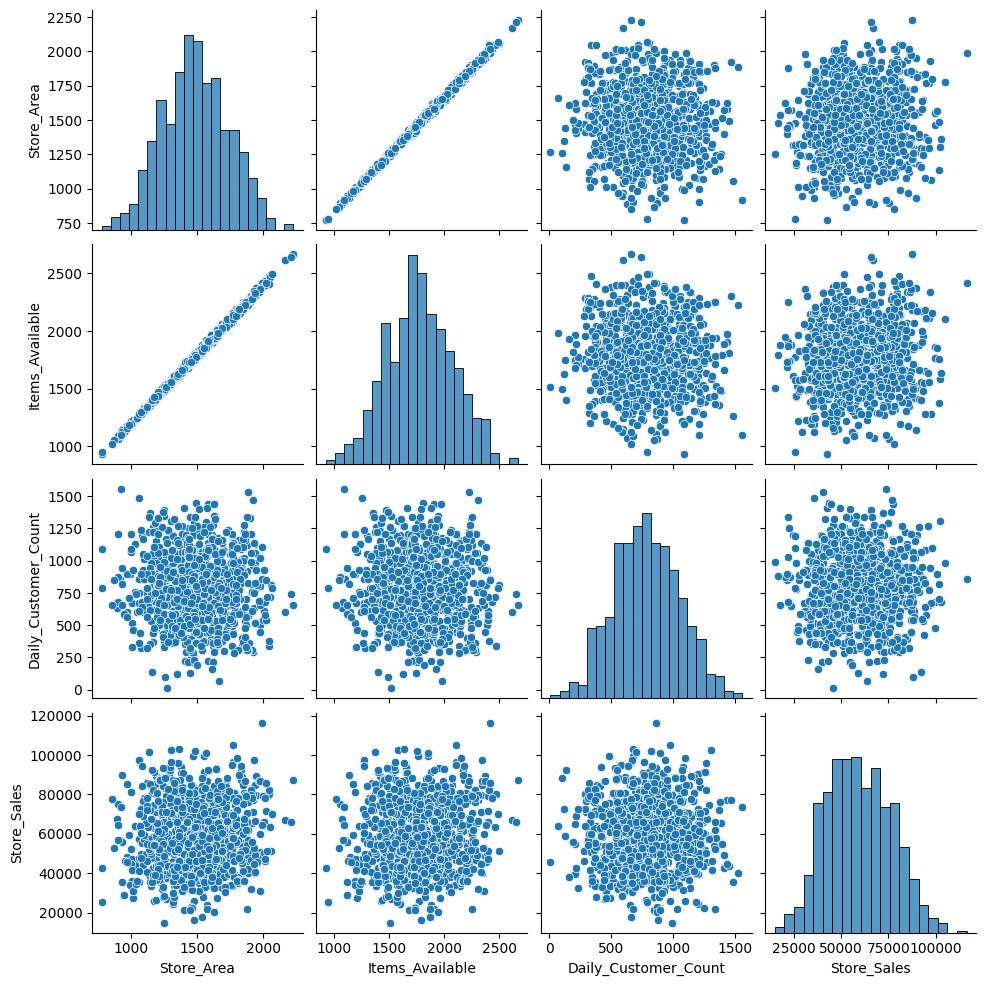

In [56]:
# Çiftli grafik (pairplot) oluştur
sns.pairplot(data)  # Veri çerçevesinde çiftli grafikler oluştur

# Grafikleri göster
plt.show()  # Tüm grafikleri ekrana getir

<Axes: xlabel='Daily_Customer_Count'>

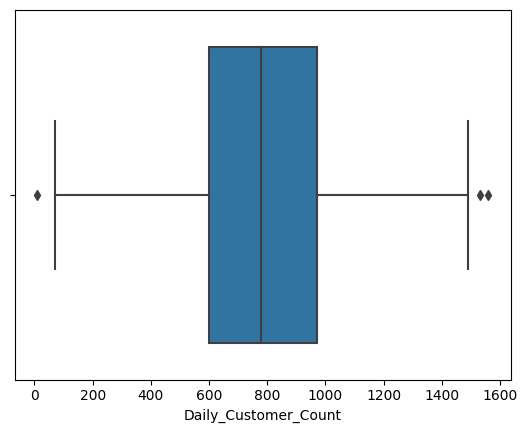

In [57]:
# 'Daily_Customer_Count' sütununda boxplot oluştur
sns.boxplot(x=data['Daily_Customer_Count'])

<Axes: xlabel='Items_Available'>

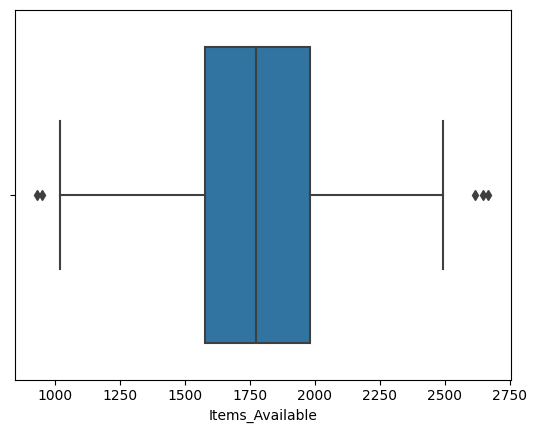

In [58]:
#'Items_Available' sütununda Boxplot oluştur
sns.boxplot(x=data['Items_Available'])

<Axes: xlabel='Store_Area'>

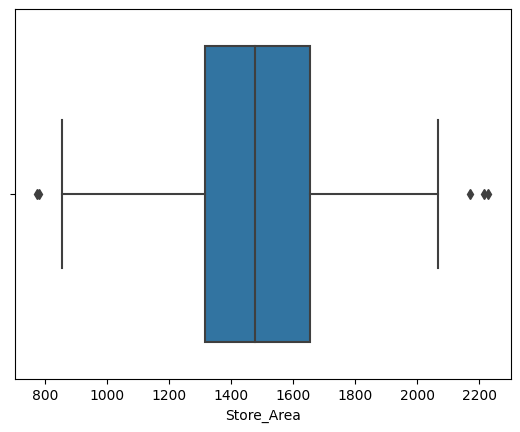

In [59]:
# 'Store_Area' sütununda boxplot oluştur
sns.boxplot(x=data['Store_Area'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


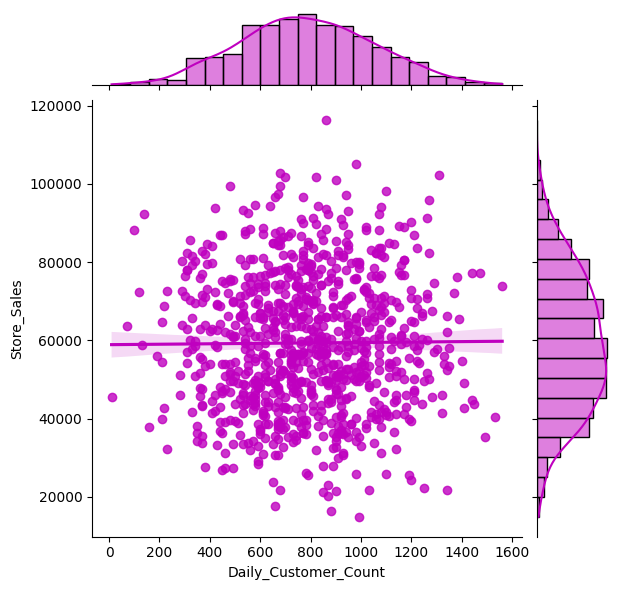

In [60]:
# 'Items_Available' ve 'Store_Sales' sütunları için bir jointplot oluştur
sns.jointplot(x='Daily_Customer_Count', y='Store_Sales', data=data, kind='reg', color='m')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


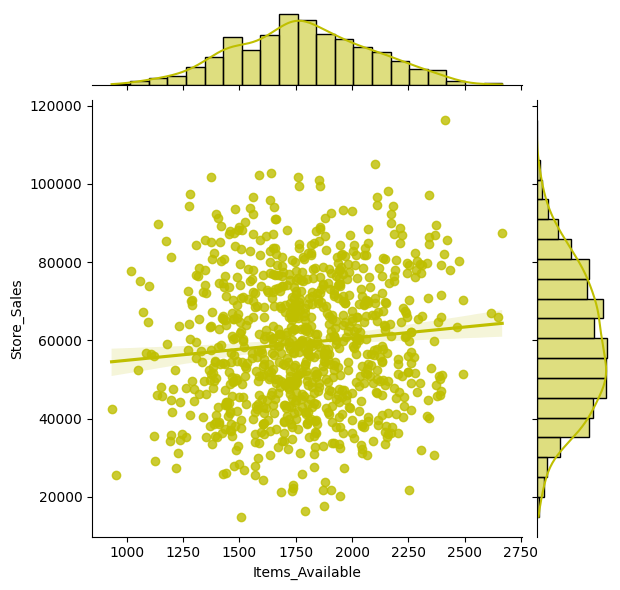

In [61]:
# 'Items_Available' ve 'Store_Sales' sütunları için bir jointplot oluştur
sns.jointplot(x='Items_Available', y='Store_Sales', data=data, kind='reg', color='y')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


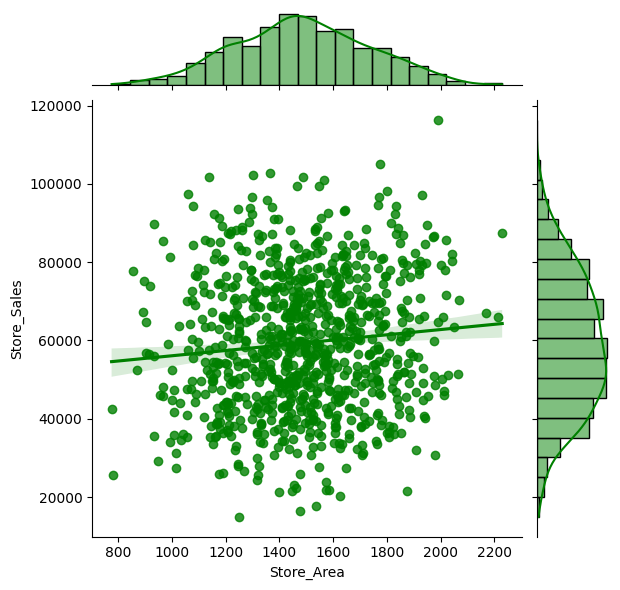

In [62]:
# 'Store_Area' ve 'Store_Sales' sütunları için bir jointplot oluştur
sns.jointplot(x='Store_Area', y='Store_Sales', data=data, kind='reg', color='g')

<Axes: >

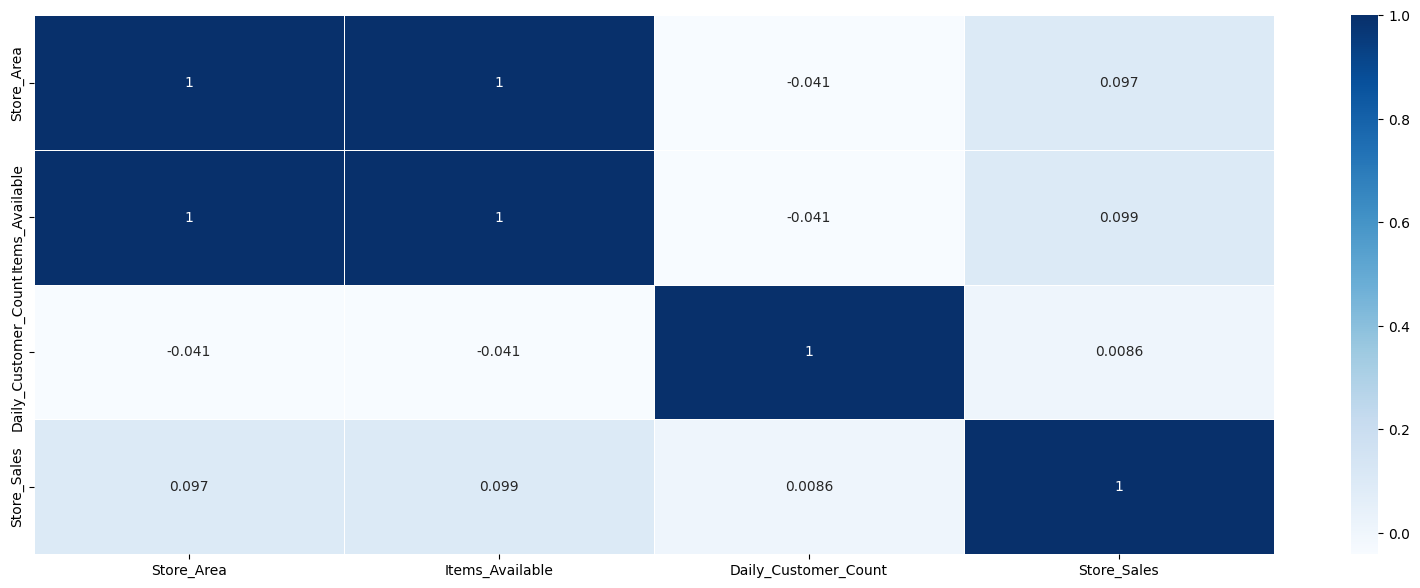

In [63]:
# Grafik boyutunu ayarla
plt.figure(figsize=(20, 7))

# Isı haritası oluştur, korelasyonları göster
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap='Blues')

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler_data= data.copy()
scaler_data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620


In [66]:
scaler = StandardScaler()

scaler_data[['Store_Area','Items_Available','Daily_Customer_Count']] = scaler.fit_transform(scaler_data[['Store_Area','Items_Available','Daily_Customer_Count']])
scaler_data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,,,,
1,0.694091,0.597135,-0.966481,66490
2,-0.097600,-0.100218,-2.172930,39820
3,-0.581412,-0.577354,-0.250151,54010
4,-0.137585,-0.113564,-0.627167,53730
5,1.137919,1.097628,-1.268093,46620


In [68]:
X=scaler_data[['Store_Area',	'Items_Available',	'Daily_Customer_Count']]
y=scaler_data['Store_Sales']

In [69]:
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

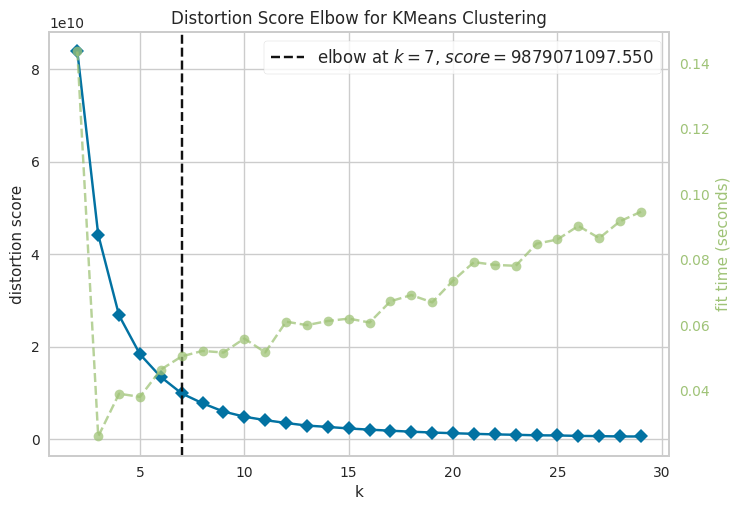

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(scaler_data) 
visualizer.poof() 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

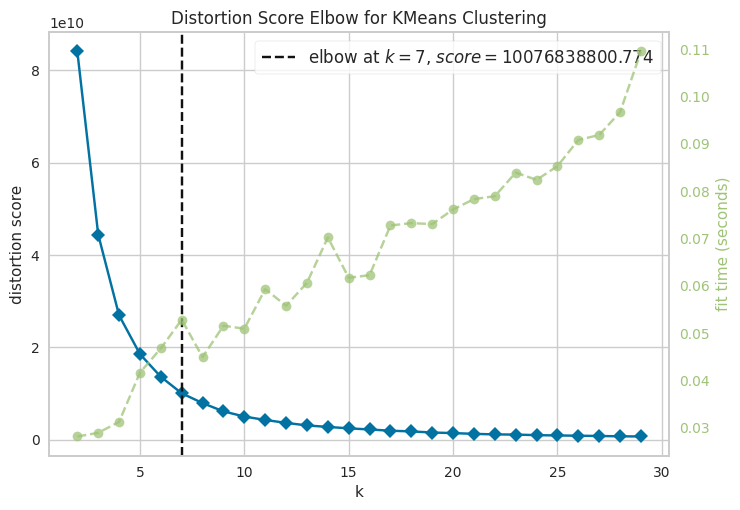

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,30))
visualizer.fit(data) 
visualizer.poof()  

In [72]:
kmeans = KMeans(n_clusters = 7).fit(data)
kumeler = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


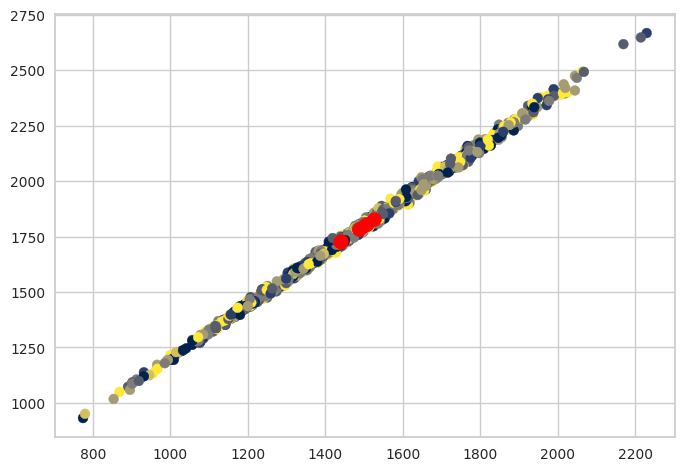

In [73]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c = kmeans.labels_, s = 50, cmap = "cividis")
merkezler = kmeans.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "red", s = 100);

In [74]:
kmeans_predict= kmeans.fit_predict(data)
kmeans_Data= pd.DataFrame(data)
kmeans_Data['Clusters']=kumeler
kmeans_Data.head(15)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Clusters
Store ID,,,,,
1,1659,1961,530,66490,2
2,1461,1752,210,39820,0
3,1340,1609,720,54010,6
4,1451,1748,620,53730,6
5,1770,2111,450,46620,6
6,1442,1733,760,45260,0
7,1542,1858,1030,72240,2
8,1261,1507,1020,37720,0
9,1090,1321,680,46310,6


In [75]:
X=kmeans_Data[['Store_Area',	'Items_Available',	'Daily_Customer_Count','Clusters']]
y=kmeans_Data['Store_Sales']

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (716, 4)
y_train (716,)
X_test (180, 4)
y_test (180,)


In [79]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [80]:
reg_cluster = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models_cluster,predictions_cluster = reg_cluster.fit(X_train, X_test, y_train, y_test)

 79%|███████▊  | 33/42 [00:03<00:00, 10.74it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 95%|█████████▌| 40/42 [00:03<00:00, 13.32it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 716, number of used features: 4
[LightGBM] [Info] Start training from score 59170.377095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 42/42 [00:04<00:00, 10.11it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [81]:
models_cluster

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.94,0.95,3861.73,0.32
HistGradientBoostingRegressor,0.94,0.94,3877.30,0.44
GradientBoostingRegressor,0.94,0.94,3915.78,0.22
RandomForestRegressor,0.94,0.94,3994.07,0.39
BaggingRegressor,0.94,0.94,4039.70,0.06
ExtraTreesRegressor,0.94,0.94,4077.39,0.24
XGBRegressor,0.93,0.94,4190.87,0.15
ExtraTreeRegressor,0.92,0.92,4579.53,0.01
DecisionTreeRegressor,0.92,0.92,4654.38,0.01
